## MANAGER SALARIES DATA ANALYSIS

In [88]:
#Importing libraries to be used
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [89]:
#Modules for cleaning data
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

In [90]:
#Setting the working directory
import os
os.chdir('/Users/attiemosona/Desktop/Project')
os.getcwd()


'/Users/attiemosona/Desktop/Project'

In [91]:
#Get the dataset
dt = pd.read_csv('Manager Salaries Survey.csv')


In [92]:
#Check top rows
dt.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [93]:
#Check bottom rows
dt.tail()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
27823,6/7/2022 23:22:00,35-44,Retail,Executive Assistant,NaN,70000,1500.0,USD,NaN,NaN,USA,Pennsylvania,Philadelphia,8 - 10 years,8 - 10 years,College degree,Woman,White
27824,6/8/2022 15:46:16,45-54,Insurance,Information Security Consultant,NaN,123000,14000.0,USD,NaN,NaN,USA,Illinois,Bloomington,21 - 30 years,11 - 20 years,College degree,Man,White
27825,6/8/2022 23:14:34,35-44,Health care,privacy officer,NaN,90000,NaN,USD,NaN,NaN,USA,Texas,Austin,11 - 20 years,5-7 years,Master's degree,Other or prefer not to answer,Another option not listed here or prefer not t...
27826,6/9/2022 9:45:49,18-24,Property or Construction,Environmental Technician,Petroleum Restoration,43000,5500.0,USD,NaN,NaN,United States,Florida,Tampa,2 - 4 years,2 - 4 years,College degree,Man,White
27827,6/10/2022 14:19:14,25-34,Business or Consulting,Analyst,NaN,75000,0.0,USD,NaN,NaN,United States of America,Virginia,"Richmond, VA",8 - 10 years,5-7 years,Master's degree,Woman,White


In [94]:
#Determine the shape of the data
dt.shape

(27828, 18)

In [95]:
#Renaming the column
columns_names = ['Date', 'Age', 'Industry', 'Job_Title', 'Job_Title_Explanation', 'Annual_Salary',
                           'Additional_Monetary_Compensation', 'Currency', 'Other_Currencies', 'Income_info', 
                           'Country', 'USA_State', 'City', 'Years_of_Work_Experience', 'Field_Work_Experience',
                           'Highest_Level_of_Education', 'Gender', 'Race']
dt = pd.read_csv('Manager Salaries Survey.csv', header=None, skiprows=1, names=columns_names)

In [96]:
dt

,Date,Age,Industry,Job_Title,Job_Title_Explanation,Annual_Salary,Additional_Monetary_Compensation,Currency,Other_Currencies,Income_info,Country,USA_State,City,Years_of_Work_Experience,Field_Work_Experience,Highest_Level_of_Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27823,6/7/2022 23:22:00,35-44,Retail,Executive Assistant,NaN,70000,1500.0,USD,NaN,NaN,USA,Pennsylvania,Philadelphia,8 - 10 years,8 - 10 years,College degree,Woman,White
27824,6/8/2022 15:46:16,45-54,Insurance,Information Security Consultant,NaN,123000,14000.0,USD,NaN,NaN,USA,Illinois,Bloomington,21 - 30 years,11 - 20 years,College degree,Man,White
27825,6/8/2022 23:14:34,35-44,Health care,privacy officer,NaN,90000,NaN,USD,NaN,NaN,USA,Texas,Austin,11 - 20 years,5-7 years,Master's degree,Other or prefer not to answer,Another option not listed here or prefer not t...
27826,6/9/2022 9:45:49,18-24,Property or Construction,Environmental Technician,Petroleum Restoration,43000,5500.0,USD,NaN,NaN,United States,Florida,Tampa,2 - 4 years,2 - 4 years,College degree,Man,White


In [97]:
#Checking missing values
dt.isnull().sum()

Date                                    0
Age                                     0
Industry                               70
Job_Title                               0
Job_Title_Explanation               20630
Annual_Salary                           0
Additional_Monetary_Compensation     7206
Currency                                0
Other_Currencies                    27640
Income_info                         24803
Country                                 0
USA_State                            4947
City                                   75
Years_of_Work_Experience                0
Field_Work_Experience                   0
Highest_Level_of_Education            210
Gender                                165
Race                                  164
dtype: int64

In [98]:
#Find percentage of the missing values
percent_missing = dt.isnull().sum()*100/len(dt)
missing_values = pd.DataFrame({'Percentage': percent_missing})

In [99]:
missing_values

,Percentage
Date,0.000000
Age,0.000000
Industry,0.251545
Job_Title,0.000000
Job_Title_Explanation,74.133966
Annual_Salary,0.000000
Additional_Monetary_Compensation,25.894782
Currency,0.000000
Other_Currencies,99.324421
Income_info,89.129654


In [100]:
#Choose columns with a 70% missing values to remove them
missing_values = missing_values[missing_values.Percentage > 70]

In [101]:
missing_values

,Percentage
Job_Title_Explanation,74.133966
Other_Currencies,99.324421
Income_info,89.129654


In [102]:
#Remove columns with more then 70% null values
dt = dt.drop(['Job_Title_Explanation','Other_Currencies', 'Income_info'], axis=1)

In [103]:
dt.head()

,Date,Age,Industry,Job_Title,Annual_Salary,Additional_Monetary_Compensation,Currency,Country,USA_State,City,Years_of_Work_Experience,Field_Work_Experience,Highest_Level_of_Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",NaN,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [104]:
dt.shape

(27828, 15)

In [105]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27828 entries, 0 to 27827
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              27828 non-null  object 
 1   Age                               27828 non-null  object 
 2   Industry                          27758 non-null  object 
 3   Job_Title                         27828 non-null  object 
 4   Annual_Salary                     27828 non-null  object 
 5   Additional_Monetary_Compensation  20622 non-null  float64
 6   Currency                          27828 non-null  object 
 7   Country                           27828 non-null  object 
 8   USA_State                         22881 non-null  object 
 9   City                              27753 non-null  object 
 10  Years_of_Work_Experience          27828 non-null  object 
 11  Field_Work_Experience             27828 non-null  object 
 12  High

In [106]:
#Fill in the missing values in addition compensation with 0 as there may not have 
#any additional compensation
dt.Additional_Monetary_Compensation.fillna(0, inplace=True)

In [107]:
dt.isnull().sum()

Date                                   0
Age                                    0
Industry                              70
Job_Title                              0
Annual_Salary                          0
Additional_Monetary_Compensation       0
Currency                               0
Country                                0
USA_State                           4947
City                                  75
Years_of_Work_Experience               0
Field_Work_Experience                  0
Highest_Level_of_Education           210
Gender                               165
Race                                 164
dtype: int64

In [108]:
dt['Industry'].value_counts()

Computing or Tech                       4646
Education (Higher Education)            2450
Nonprofits                              2408
Government and Public Administration    1881
Health care                             1878
                                        ... 
Luxury Fashion                             1
Data Entry                                 1
Wholesale and retail trade                 1
E-commerce                                 1
CPG                                        1
Name: Industry, Length: 1205, dtype: int64

In [109]:
#Change the data type to numerical values
dt['Annual_Salary'] = dt['Annual_Salary'].str.replace(',', '').astype(float)

In [110]:
#Satistical summary of the numeric categories
dt.describe()

,Annual_Salary,Additional_Monetary_Compensation
count,2.782800e+04,2.782800e+04
mean,1.432217e+05,1.352270e+04
std,5.382585e+06,7.205310e+05
min,0.000000e+00,0.000000e+00
25%,5.400000e+04,0.000000e+00
50%,7.527500e+04,0.000000e+00
75%,1.100000e+05,5.000000e+03
max,8.700000e+08,1.200000e+08


In [111]:
#Function to impute missing categorical values
def impute_missing(df):
   
    for col in df.columns:
        if df[col].isnull().any():
            if col != "USA_State":
                frequent_value = df[col].mode()
                df[col].fillna(frequent_value.item(), inplace=True)
            else:
                df.USA_State.fillna("Not Available", inplace=True)
        

In [112]:
impute_missing(dt)

In [113]:
dt.isnull().sum()

Date                                0
Age                                 0
Industry                            0
Job_Title                           0
Annual_Salary                       0
Additional_Monetary_Compensation    0
Currency                            0
Country                             0
USA_State                           0
City                                0
Years_of_Work_Experience            0
Field_Work_Experience               0
Highest_Level_of_Education          0
Gender                              0
Race                                0
dtype: int64

In [114]:
dt['USA_State'].value_counts()

Not Available           4947
California              2593
New York                2158
Massachusetts           1516
Texas                   1249
                        ... 
Illinois, Kentucky         1
Illinois, Wisconsin        1
California, Oklahoma       1
Alabama, Kansas            1
Alabama, Oregon            1
Name: USA_State, Length: 132, dtype: int64

In [115]:
#Change the date type from string to datetime type

dt['Date'] = pd.to_datetime(dt['Date']).dt.date

In [116]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27828 entries, 0 to 27827
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              27828 non-null  object 
 1   Age                               27828 non-null  object 
 2   Industry                          27828 non-null  object 
 3   Job_Title                         27828 non-null  object 
 4   Annual_Salary                     27828 non-null  float64
 5   Additional_Monetary_Compensation  27828 non-null  float64
 6   Currency                          27828 non-null  object 
 7   Country                           27828 non-null  object 
 8   USA_State                         27828 non-null  object 
 9   City                              27828 non-null  object 
 10  Years_of_Work_Experience          27828 non-null  object 
 11  Field_Work_Experience             27828 non-null  object 
 12  High

In [117]:
#Set seed for reproducibility
np.random.seed(0)

In [118]:
#convert to lower case and remove white spaces
dt['Country'] = dt['Country'].str.lower()
dt['Country'] = dt['Country'].str.strip()

In [119]:
#Get all unique values for country column and sort them alphabetically
def review_country():
    countries = dt['Country'].unique()
    countries.sort()
    return countries

In [120]:
#Get the closest matches 
def get_matches(query, choices, limit=67):
    matches = fuzzywuzzy.process.extract(query, choices, limit=limit, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    return matches

In [121]:
#Get closest matches for united states
get_matches("united states", review_country())

[('united  states', 100),
 ('united states', 100),
 ('uniited states', 96),
 ('unite states', 96),
 ('united sates', 96),
 ('united state', 96),
 ('united stateds', 96),
 ('united statees', 96),
 ('united statesp', 96),
 ('united stattes', 96),
 ('united statues', 96),
 ('united sttes', 96),
 ('uniteed states', 96),
 ('unitied states', 96),
 ('unted states', 96),
 ('united stares', 92),
 ('united statea', 92),
 ('united stated', 92),
 ('united statew', 92),
 ('united statss', 92),
 ('united status', 92),
 ('united statws', 92),
 ('unites states', 92),
 ('uniyed states', 92),
 ('untied states', 92),
 ('the united states', 87),
 ('unitef stated', 85),
 ('uniter statez', 85),
 ('uniyes states', 85),
 ('united states is america', 70),
 ('united states of america', 70),
 ('united states of american', 68),
 ('united states of americas', 68),
 ('united states- puerto rico', 68),
 ('united arab emirates', 67),
 ('united sates of america', 67),
 ('united state of america', 67),
 ('united y', 57

In [122]:
#Function that searches and matches in the country column for strings matching united states
#and compares them to a certain ratio then replace the string in the dataframe
def replace_matches(df, column, string_to_match, min_ratio = 67):
    
    strings = df[column].unique()
   
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=37, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

   
    rows_with_matches = df[column].isin(close_matches)

    
    df.loc[rows_with_matches, column] = string_to_match
    

In [123]:
#Call function to match and replace for united states
replace_matches(df=dt, column='Country', string_to_match="united states")
replace_matches(df=dt, column='Country', string_to_match="usa")
replace_matches(df=dt, column='Country', string_to_match="u.sa")

In [124]:
#Call function to match and replace for united kingdom
replace_matches(df=dt, column='Country', string_to_match="united kingdom")
replace_matches(df=dt, column='Country', string_to_match="u.k")
replace_matches(df=dt, column='Country', string_to_match="uk")
replace_matches(df=dt, column='Country', string_to_match="england")


In [125]:
#Call function to match and replace for canada
replace_matches(df=dt, column='Country', string_to_match="canada")

In [126]:
review_country()

array(['$2,175.84/year is deducted for benefits', 'afghanistan', 'africa',
       'america', 'aotearoa new zealand', 'argentina',
       'argentina but my org is in thailand', 'australi', 'australia',
       'australian', 'austria',
       'austria, but i work remotely for a dutch/british company',
       'bangladesh', 'belgium', 'bermuda',
       'bonus based on meeting yearly goals set w/ my supervisor',
       'bosnia and herzegovina', 'brasil', 'brazil', 'britain',
       'bulgaria', 'california', 'cambodia', 'canada', 'canada and usa',
       'canada, ottawa, ontario', 'catalonia', 'cayman islands', 'chile',
       'china', 'colombia', 'company in germany. i work from pakistan.',
       'congo', 'contracts', 'costa rica', "cote d'ivoire", 'croatia',
       'cuba', 'currently finance', 'cyprus', 'czech republic', 'czechia',
       'danmark', 'denmark', 'ecuador', 'england', 'eritrea', 'estonia',
       'europe', 'for the united states government, but posted overseas',
       'franc

In [127]:
#Replace the common abbreviated values of the United States 
united_states = ['usa', 'u.sa', 'unitedstates']
dt['Country'] = dt['Country'].replace(to_replace=united_states, value='united states')

In [128]:
#Check if the repeated and missed values are removed.
review_country()

array(['$2,175.84/year is deducted for benefits', 'afghanistan', 'africa',
       'america', 'aotearoa new zealand', 'argentina',
       'argentina but my org is in thailand', 'australi', 'australia',
       'australian', 'austria',
       'austria, but i work remotely for a dutch/british company',
       'bangladesh', 'belgium', 'bermuda',
       'bonus based on meeting yearly goals set w/ my supervisor',
       'bosnia and herzegovina', 'brasil', 'brazil', 'britain',
       'bulgaria', 'california', 'cambodia', 'canada', 'canada and usa',
       'canada, ottawa, ontario', 'catalonia', 'cayman islands', 'chile',
       'china', 'colombia', 'company in germany. i work from pakistan.',
       'congo', 'contracts', 'costa rica', "cote d'ivoire", 'croatia',
       'cuba', 'currently finance', 'cyprus', 'czech republic', 'czechia',
       'danmark', 'denmark', 'ecuador', 'england', 'eritrea', 'estonia',
       'europe', 'for the united states government, but posted overseas',
       'franc

In [129]:
#Replace the common abbreviated values of the United Kingdom 
united_kingdom = ['uk', 'u.k', 'england']
dt['Country'] = dt['Country'].replace(to_replace=united_kingdom, value='united kingdom')

In [130]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27828 entries, 0 to 27827
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              27828 non-null  object 
 1   Age                               27828 non-null  object 
 2   Industry                          27828 non-null  object 
 3   Job_Title                         27828 non-null  object 
 4   Annual_Salary                     27828 non-null  float64
 5   Additional_Monetary_Compensation  27828 non-null  float64
 6   Currency                          27828 non-null  object 
 7   Country                           27828 non-null  object 
 8   USA_State                         27828 non-null  object 
 9   City                              27828 non-null  object 
 10  Years_of_Work_Experience          27828 non-null  object 
 11  Field_Work_Experience             27828 non-null  object 
 12  High

In [131]:
#Check currencies to be converted
currencies = dt['Currency'].unique()
currencies

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

In [132]:
#Conversion rate as at 24 June 2022 from oanda.com
conversion_val = {'USD':1, 'GBP':0.81678, 'CAD':1.29731,'EUR':0.94941, 'AUD/NZD':1.44997, 'Other':14.836, 
                 'CHF':0.96192, 'ZAR': 15.9639, 'SEK':10.156, 'HKD':7.84909, 'JPY':135.219}
conversion_val

{'USD': 1,
 'GBP': 0.81678,
 'CAD': 1.29731,
 'EUR': 0.94941,
 'AUD/NZD': 1.44997,
 'Other': 14.836,
 'CHF': 0.96192,
 'ZAR': 15.9639,
 'SEK': 10.156,
 'HKD': 7.84909,
 'JPY': 135.219}

In [133]:
#Convert the salaries to USD and a separate column
dt['salary_usd'] = 0 # Declare Column for Salary in USD

for key, value in conversion_val.items():
    for x, xRow in dt.iterrows():
        if(key in xRow['Currency'] ):
            salVal = xRow['Annual_Salary']
            salVal = round(int(salVal) / value, 2)
            dt.at[x, "salary_usd"] = salVal
dt

,Date,Age,Industry,Job_Title,Annual_Salary,Additional_Monetary_Compensation,Currency,Country,USA_State,City,Years_of_Work_Experience,Field_Work_Experience,Highest_Level_of_Education,Gender,Race,salary_usd
0,2021-04-27,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,united states,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000
1,2021-04-27,25-34,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,united kingdom,Not Available,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,66847
2,2021-04-27,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,united states,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000
3,2021-04-27,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,united states,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,62000
4,2021-04-27,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,united states,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27823,2022-06-07,35-44,Retail,Executive Assistant,70000.0,1500.0,USD,united states,Pennsylvania,Philadelphia,8 - 10 years,8 - 10 years,College degree,Woman,White,70000
27824,2022-06-08,45-54,Insurance,Information Security Consultant,123000.0,14000.0,USD,united states,Illinois,Bloomington,21 - 30 years,11 - 20 years,College degree,Man,White,123000
27825,2022-06-08,35-44,Health care,privacy officer,90000.0,0.0,USD,united states,Texas,Austin,11 - 20 years,5-7 years,Master's degree,Other or prefer not to answer,Another option not listed here or prefer not t...,90000
27826,2022-06-09,18-24,Property or Construction,Environmental Technician,43000.0,5500.0,USD,united states,Florida,Tampa,2 - 4 years,2 - 4 years,College degree,Man,White,43000


In [134]:
dt.groupby('Currency').sum()

,Annual_Salary,Additional_Monetary_Compensation,salary_usd
Currency,,,
AUD/NZD,5.279444e+07,2481833.0,36410457
CAD,1.372001e+08,8631262.0,105756555
CHF,4.903320e+06,394000.0,5097410
EUR,3.894800e+07,3530365.0,41023078
GBP,7.869739e+07,6604804.0,96350002
HKD,1.907000e+06,10000.0,242955
JPY,1.391425e+08,6125000.0,1029003
Other,1.264269e+09,125332509.0,85216199
SEK,2.076434e+07,516648.0,2044523


Annual_Salary                          AxesSubplot(0.125,0.657941;0.227941x0.222059)
Additional_Monetary_Compensation    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
salary_usd                          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
dtype: object

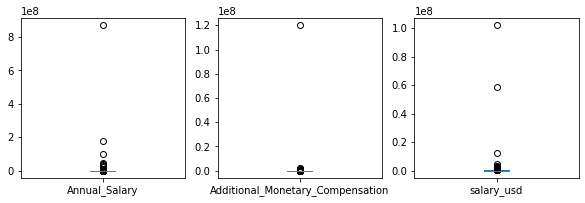

In [135]:
#Checking for outliers with a boxplot
dt.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))

In [136]:
#set so that all the array values can be seen
import sys
np.set_printoptions(threshold=sys.maxsize)

In [137]:
#Using z-score to detect for outliers get the all the z-scores
from scipy import stats
z = stats.zscore(dt['salary_usd'])
z_abs = np.abs(z)

In [138]:
#Get z-scores found in the 3 standard deviations
outliers = np.where(z_abs > 3)
outliers

(array([ 2124,  3605, 11454, 18498, 18984, 22871, 23490, 26466]),)

In [139]:
#remove outliers
dt.drop(outliers[0], inplace=True)

<AxesSubplot:>

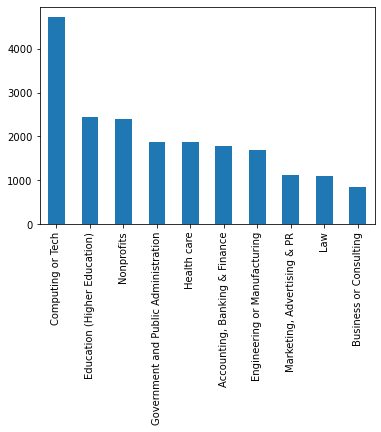

In [140]:
#Industry frequency
dt['Industry'].value_counts().head(10).plot.bar()

# INDUSTRY THAT PAYS THE MOST

In [141]:
#Determining which industry pays the most
industry = dt.groupby('Industry').sum()
industry.sort_values(['salary_usd'],ascending=False).head(20)

,Annual_Salary,Additional_Monetary_Compensation,salary_usd
Industry,,,
Computing or Tech,636256641.0,105536560.0,565669211
Nonprofits,174225596.0,2904769.0,170123703
Health care,172464597.0,11153809.0,166653759
Education (Higher Education),186934858.0,2786882.0,163531781
"Accounting, Banking & Finance",161667802.0,29603617.0,156272539
Engineering or Manufacturing,171013385.0,16668760.0,155836697
Government and Public Administration,157526156.0,1992386.0,147905925
Law,128662840.0,13521133.0,126810624
"Marketing, Advertising & PR",114262547.0,7652440.0,94146657


[Text(0, 0.5, 'Industry'),
 Text(0.5, 0, 'Salary in millions'),
 Text(0.5, 1.0, 'MOST PAYING INDUSTRY')]

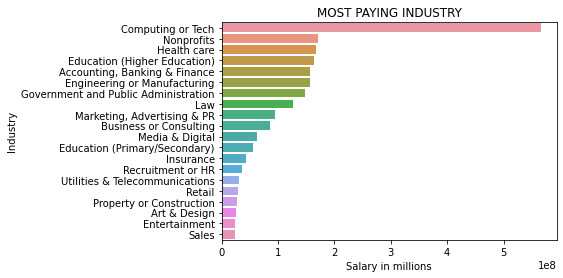

In [142]:
#Visualising the top 20 most paying industries
plot_industry = industry.sort_values(['salary_usd'],ascending=False).head(20)

ind_plot = sns.barplot(y = plot_industry.index, x = plot_industry.salary_usd)

ind_plot.set(ylabel='Industry', xlabel ='Salary in millions',  title ='MOST PAYING INDUSTRY')

#ind_plot.tick_params(axis='x', rotation=90)

#Saving the figure
#ind_plot.figure.savefig("industry1.png")



In [143]:
print("The industry that pays the most is Computing or Tech")

The industry that pays the most is Computing or Tech


<AxesSubplot:xlabel='salary_usd', ylabel='Count'>

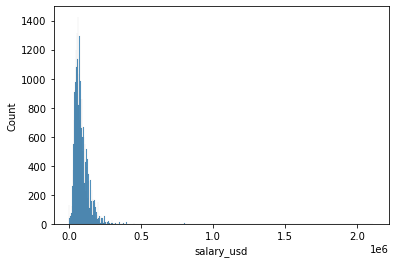

In [144]:
#Histogram
sns.histplot(dt['salary_usd'])

# THE INCREASE IN SALARY GIVEN YEARS OF EXPERIENCE

In [145]:
#Check the media salary earned per years of experience
dt.groupby('Years_of_Work_Experience').median()

,Annual_Salary,Additional_Monetary_Compensation,salary_usd
Years_of_Work_Experience,,,
1 year or less,55000.0,0.0,52000.0
11 - 20 years,84000.0,0.0,82000.0
2 - 4 years,59600.0,0.0,57000.0
21 - 30 years,90000.0,0.0,87000.0
31 - 40 years,90000.0,0.0,86000.0
41 years or more,88500.0,1000.0,86500.0
5-7 years,67150.0,0.0,65000.0
8 - 10 years,75000.0,0.0,72500.0


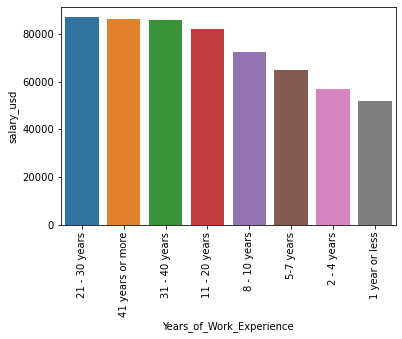

In [146]:
#visualizing how the salary increases with the work experience
workexp = dt.groupby('Years_of_Work_Experience').median()
exp = workexp.sort_values(['salary_usd'],ascending=False)

work_plot = sns.barplot(x = exp.index, y = exp.salary_usd)
work_plot.tick_params(axis='x', rotation=90)

# HOW RACE AND EDUCATION CORRELATE WITH SALARY

<AxesSubplot:>

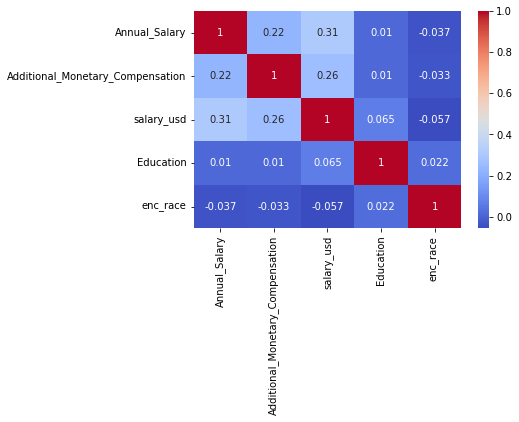

In [147]:
#the correlation between the salary earned and the number of years worked and race with a heatmap
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
dt['Education'] = enc.fit_transform(dt['Highest_Level_of_Education'])
dt['enc_race'] = enc.fit_transform(dt['Race'])
sns.heatmap(dt.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')



In [148]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27827
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              27820 non-null  object 
 1   Age                               27820 non-null  object 
 2   Industry                          27820 non-null  object 
 3   Job_Title                         27820 non-null  object 
 4   Annual_Salary                     27820 non-null  float64
 5   Additional_Monetary_Compensation  27820 non-null  float64
 6   Currency                          27820 non-null  object 
 7   Country                           27820 non-null  object 
 8   USA_State                         27820 non-null  object 
 9   City                              27820 non-null  object 
 10  Years_of_Work_Experience          27820 non-null  object 
 11  Field_Work_Experience             27820 non-null  object 
 12  High

# HOW SALARIES DIFFER BY GENDER AND YEARS OF EXPERIENCE

In [149]:

pd.pivot_table(dt, index = ['Gender','Years_of_Work_Experience'], 
               values = 'salary_usd', aggfunc = 'median').sort_values('Gender', ascending = False)

salary_usd
Gender                        Years_of_Work_Experience            
Woman                         8 - 10 years                 71000.0
                              5-7 years                    64200.0
                              41 years or more             79880.0
                              31 - 40 years                78000.0
                              21 - 30 years                80000.0
                              2 - 4 years                  56000.0
                              11 - 20 years                78000.0
                              1 year or less               52000.0
Prefer not to answer          1 year or less               88000.0
Other or prefer not to answer 2 - 4 years                  55000.0
                              8 - 10 years                 75000.0
                              5-7 years                    58093.0
                              41 years or more            105000.0
                              31 - 40 years                79900.0
                              21 - 30 years                90000.0
                              11 - 20 years                88000.0
                              1 year or less               65000.0
Non-binary                    8 - 10 years                 57000.0
                              5-7 years                    51421.0
                              31 - 40 years                52439.5
                              21 - 30 years                92749.5
                              2 - 4 years                  48000.0
                              11 - 20 years                68562.0
                              1 year or less               37434.0
Man                           11 - 20 years               103595.0
                              8 - 10 years                 89657.0
                              5-7 years                    75000.0
                              41 years or more            107915.0
                              31 - 40 years               115861.0
                              21 - 30 years               120000.0
                              2 - 4 years                  64251.5
                              1 year or less               50960.0

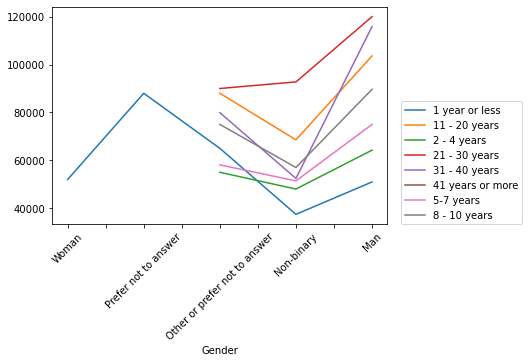

In [150]:
#visualizing how salaries differ by gender and years of experience
pd.pivot_table(dt, index = 'Gender', columns='Years_of_Work_Experience', 
               values = 'salary_usd', aggfunc = 'median').sort_values('Gender', ascending = False).plot()
plt.xticks(rotation=45)
plt.legend(loc=(1.04,0))

In [151]:
#Save edited dataset
dt.to_csv('manager_salaries_copy.csv')